In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as scp
from sklearn.metrics import r2_score
import sympy as sym

In [113]:
datos_helio = np.array([36.9,37.1, 38.1, 39.1])
datos_helio=np.deg2rad(datos_helio)
alpha=np.deg2rad(60)
error=np.deg2rad(0.1)

In [128]:
error=(1/2*(np.cos((alpha+datos_helio)/2))/(np.sin(alpha/2)))*error
error

array([0.00076783, 0.0007648 , 0.00074971, 0.00073465])

In [115]:
n=(np.sin((alpha+datos_helio)/2))/(np.sin(alpha/2))
n

array([1.49675438, 1.49906736, 1.51056362, 1.52194485])

In [116]:
wavelength=np.array([667.8,587.6,501.6,388.8])
def modelo (x,a,b):
    return a+(b/(x**2))
popt, pcov = scp.curve_fit(modelo, wavelength, n)
x_model=np.linspace(min(wavelength), max(wavelength),100)
popt

array([1.48384187e+00, 5.91049756e+03])

In [117]:
residuales=n-modelo(wavelength,*popt)
r2=r2_score(n,modelo(wavelength,*popt))
residuales

array([-0.00034101, -0.0018928 ,  0.00323035, -0.00099654])

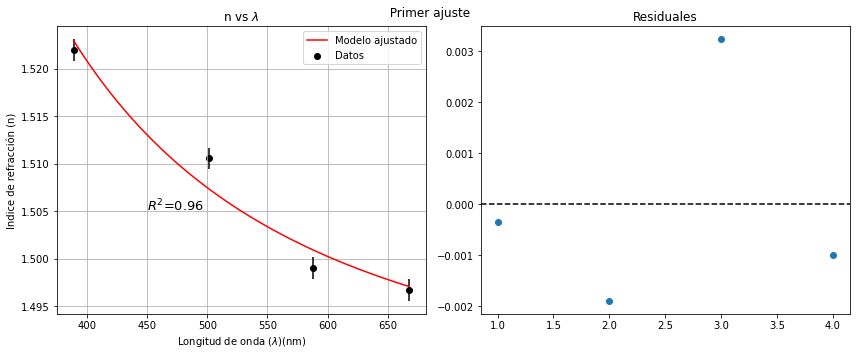

In [118]:
fig, axs = plt.subplots(1, 2,sharex=False,figsize=(12,5))
fig.suptitle(' Primer ajuste')
axs[0].scatter(wavelength,n,label='Datos',color='k')
axs[0].plot(x_model,modelo(x_model,*popt),"-r", label='Modelo ajustado')
axs[0].errorbar(wavelength,n,yerr=error,fmt='none',color='k')
axs[0].set_title('n vs $\lambda$ ')
axs[0].set_ylabel('Indice de refracción (n)')
axs[0].set_xlabel('Longitud de onda ($\lambda$)(nm)')
axs[0].legend(loc=0)
axs[0].grid()
axs[0].text(450,1.505,f'$R^2$={r2:.2f}',fontsize=13)


axs[1].axhline(y=0,color='k',linestyle='--')
axs[1].scatter(np.arange(1,wavelength.shape[0]+1,1),residuales)
axs[1].set_title('Residuales')
plt.tight_layout()

In [42]:
def modelo_2(x,a,b,c):
    return a+(b/(x**2))+(c/(x**4))
popt2, pcov2 = scp.curve_fit(modelo_2, wavelength, n)
x_model=np.linspace(min(wavelength), max(wavelength),100)
popt2

/Users/davidysofia/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([1.48384187e+00, 5.91049776e+03, 1.00000000e+00])

In [122]:
residuales=n-modelo_2(wavelength,*popt2)
r2=r2_score(n,modelo_2(wavelength,*popt2))
residuales

array([-0.00034101, -0.0018928 ,  0.00323035, -0.00099655])

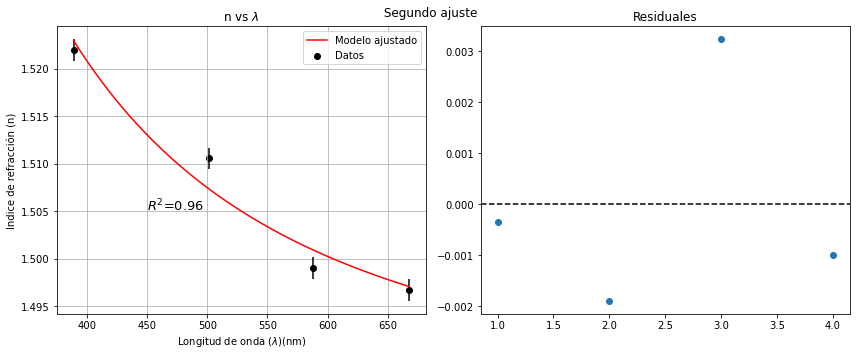

In [123]:
fig, axs = plt.subplots(1, 2,sharex=False,figsize=(12,5))
fig.suptitle(' Segundo ajuste')
axs[0].scatter(wavelength,n,label='Datos',color='k')
axs[0].plot(x_model,modelo_2(x_model,*popt2),"-r", label='Modelo ajustado')
axs[0].errorbar(wavelength,n,yerr=error,fmt='none',color='k')
axs[0].set_title('n vs $\lambda$ ')
axs[0].set_ylabel('Indice de refracción (n)')
axs[0].set_xlabel('Longitud de onda ($\lambda$)(nm)')
axs[0].legend(loc=0)
axs[0].grid()
axs[0].text(450,1.505,f'$R^2$={r2:.2f}',fontsize=13)


axs[1].axhline(y=0,color='k',linestyle='--')
axs[1].scatter(np.arange(1,wavelength.shape[0]+1,1),residuales)
axs[1].set_title('Residuales')
plt.tight_layout()

In [124]:
def lamb(modelo,popt,n):
    soluciones=np.array([])
    x=sym.Symbol('x',real=True)
    for i in n:
        eq=sym.lambdify(x,modelo(x,*popt))
        eq=sym.Eq(eq(x),i)
        sol=sym.solve(eq,x)
        soluciones=np.append(soluciones,sol)
    return soluciones


In [176]:
n2=np.array([3,4,6])
n2=1/4-1/(n2**2)

In [177]:
datos_hidrogeno=np.array([37.1, 38.2, 40.2])
datos_hidrogeno=np.deg2rad(datos_hidrogeno)
n1=(np.sin((alpha+datos_hidrogeno)/2))/(np.sin(alpha/2))
n1

array([1.49906736, 1.51170694, 1.5343303 ])

In [178]:
error=np.deg2rad(0.1)
error=(1/2*(np.cos((alpha+datos_hidrogeno)/2))/(np.sin(alpha/2)))*error
error

array([0.00115535, 0.00114274, 0.00111954])

In [179]:
np.zeros(shape=(1,1))

array([[0.]])

In [180]:
lamb(modelo,popt,n1)

array([-623.054933408409, 623.054933408409, -460.555476636532,
       460.555476636532, -342.149622241034, 342.149622241034],
      dtype=object)

In [181]:
lambd=np.array([623.054933408409,460.555476636532,342.149622241034])

In [269]:
error_A=np.sqrt(np.diag(pcov)[0])
error_B=np.sqrt(np.diag(pcov)[1])
error_lamb=np.sqrt((error_B/(2*(n1-popt[0])*np.sqrt(popt[1]/(n1-popt[0]))))**2+(popt[0]*popt[1]*error_A/(2*np.sqrt(popt[1]/(n1-popt[0]))*(n1-popt[0])**2))**2+(popt[1]*error/(2*np.sqrt(popt[1]/(n1-popt[0]))*(n1-popt[0])**2))**2)
error_lamb

array([117.79479354,  54.63668666,  29.95286535])

In [270]:
lamb(modelo_2,popt2,n1)

array([-623.054927524183, 623.054927524183, -460.555477939748,
       460.555477939748, -342.149625553310, 342.149625553310],
      dtype=object)

In [271]:
y=1/lambd
coefficients,cov=np.polyfit(n2,y,1,cov=True)
poly=np.poly1d(coefficients)
x_trend = np.linspace(min(n2), max(n2), 100)
y_trend = poly(x_trend)
r2=r2_score(y,poly(n2))
coefficients,cov

(array([ 0.01554509, -0.00060974]),
 array([[ 7.71901667e-06, -1.41157944e-06],
        [-1.41157944e-06,  2.67152824e-07]]))

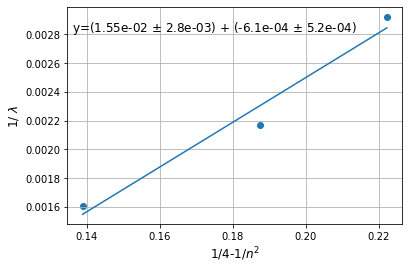

In [272]:
plt.scatter(n2,y)
plt.plot(x_trend,y_trend)
plt.text(0.136,0.00282,f'y=({coefficients[0]:.2e} $\pm$ {np.sqrt(cov[0,0]):.1e}) + ({coefficients[1]:.1e} $\pm$ {np.sqrt(cov[1,1]):.1e})', fontsize=12)
plt.xlabel("1/4-1/$n^2$",fontsize=12)
plt.ylabel("1/ $\lambda$", fontsize=12)
plt.grid()

In [273]:
Ry2=coefficients[0]*(10**9)
err1=np.sqrt(cov[0,0])*(10**9)

In [274]:
rendija_helio=np.array([24.3, 23.2, 19.1, 17.1])
rendija_helio=np.deg2rad(rendija_helio)
d=wavelength/np.sin(rendija_helio)
d_t=np.mean(d)
d_t,np.std(d)

(1492.3920505096446, 109.07395325148188)

In [225]:
rendija_hidrogeno=np.array([23.2,19.1, 17.2])
rendija_hidrogeno=np.deg2rad(rendija_hidrogeno)

In [226]:
l=d_t*np.sin(rendija_hidrogeno)
l

array([587.91577424, 488.33739122, 441.31234316])

In [228]:
error_r=np.deg2rad(0.1)
error_l=np.sqrt((np.std(d)*np.sin(rendija_hidrogeno))**2+(d_t*np.cos(rendija_hidrogeno)*error_r)**2)
error_l

array([43.03544521, 35.77571816, 32.34988045])

In [232]:
real_hid=np.array([656.3,486.6,410.2])
error_p1=np.abs(lambd-real_hid)/real_hid
error_p1

array([0.05065529, 0.05352348, 0.16589561])

In [234]:
error_p2=np.abs(l-real_hid)/real_hid
error_p2

array([0.1041966 , 0.00357047, 0.07584677])

In [264]:
y1=1/l
coefficients1,cov=np.polyfit(n2,y1,1,cov=True)
poly=np.poly1d(coefficients1)
x_trend = np.linspace(min(n2), max(n2), 100)
y_trend = poly(x_trend)
r2=r2_score(y1,poly(n2))
coefficients,cov

(array([ 0.01554509, -0.00060974]),
 array([[ 5.59658289e-08, -1.02344919e-08],
        [-1.02344919e-08,  1.93696035e-09]]))

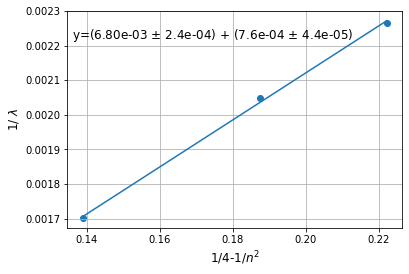

In [265]:
plt.scatter(n2,y1)
plt.plot(x_trend,y_trend)
plt.text(0.136,0.00222,f'y=({coefficients1[0]:.2e} $\pm$ {np.sqrt(cov[0,0]):.1e}) + ({coefficients1[1]:.1e} $\pm$ {np.sqrt(cov[1,1]):.1e})', fontsize=12)
plt.xlabel("1/4-1/$n^2$",fontsize=12)
plt.ylabel("1/ $\lambda$", fontsize=12)
plt.grid()

In [275]:
Ry1=coefficients1[0]*(10**9)
err=coefficients[1]*(10**9)

In [276]:
Ryh=1.0973e7
error_p11=np.abs(Ry2-Ryh)/Ryh
error_p22=np.abs(Ry1-Ryh)/Ryh
error_p11,error_p22

(0.4166675707090508, 0.3799961119291844)

In [268]:
Ry2

6803302.663801059

In [250]:
Ry2

6803302.663801059